# Bayesian classifier
In statistical classification, the Bayes classifier minimizes the probability of misclassification.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

In [2]:
#data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = pd.read_csv('data/Iris.csv', header=(0))
# data = pd.read_csv('data/Vehicle.csv', header=(0))
# data = pd.read_csv(r'data\pima-indians-diabetes.csv', index_col = 0)

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)
data.head(10)

Matriz de atributos: Número de linhas: 150  colunas:  5


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Vamos construir as variáveis $X$ e $y$, sendo que o processo classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

Convertemos os dados para o formato Numpy para facilitar a sua manipulação. 

In [3]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Vamos normalizar os dados, de modo a evitar o efeito da escala dos atributos.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X) # z = (x-u)/s
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Desvio Padrao: [1. 1. 1. 1.]


## Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [5]:
from sklearn.model_selection import train_test_split
p = 0.8 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

A partir desse conjunto de dados, podemos realizar a classificação.

## Classificador Bayesiano

Vamos considerar o caso paramétrico, assumindo que cada variável está distribuída de acordo com uma distribuição Normal. Outras distribuições também podem ser utilizadas.

Já selecionamos os conjuntos de treinamento e teste anteriormente. No conjunto de treinamento, vamos calcular a média e desvio padrão de cada atributo para cada classe. A seguir, realizamos a classificação, dos dados usando a teoria da decisão Bayesiana, isto é: $X \in C_i$ se, e somente se, $P(C_i|X) = \max P(C_j|X)$ para todo $j$.

In [6]:
from scipy.stats import multivariate_normal

print('\n\ncódigo original\n')
#matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) # probability of each class
Pc = np.zeros(len(classes)) #fraction of elements in each class

    # para cada classe i
for i in np.arange(0, len(classes)):
    # tupla da posição em que o elemento é da classe i
    elements = tuple(np.where(y_train == classes[i])) 
    
    #OBSERVAR AQUI
    Pc[i] = len(elements)/len(y_train)
    
    print(f'Tipo Elements:\t{type(elements)}')
    print(f'Tamanho Elements:{len(elements)}\nElements:{elements}\n')
    # Z tem as linhas com os elementos de cada classe e as colunas os atributos mesmo
    Z = x_train[elements,:][0]
    # média de elementos da classe para cada atributo da classe
    m = np.mean(Z, axis = 0)
    # covariancia entre os atributos de cada classe
    cv = np.cov(np.transpose(Z))
    
    ## calculo da probabilidade
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        # probabilidade considerando a verossimilhança
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        # prioris
        prior = Pc[i]
        # funciona assim porque o número de classes é discreto
        # probabilidade é a priori vezes a posteriori
        P[classes[i]][j] = pj*prior
        # eu não preciso dividir pela a informação porque é proporcional



código original

Tipo Elements:	<class 'tuple'>
Tamanho Elements:1
Elements:(array([  0,   1,   3,   4,   7,   8,   9,  13,  14,  23,  26,  27,  28,
        31,  32,  33,  35,  38,  41,  48,  51,  52,  55,  57,  58,  66,
        67,  70,  71,  72,  75,  78,  84,  91,  94,  98, 102, 104, 114,
       117], dtype=int64),)

Tipo Elements:	<class 'tuple'>
Tamanho Elements:1
Elements:(array([  2,   6,  11,  12,  15,  18,  20,  22,  25,  29,  34,  36,  39,
        44,  45,  47,  49,  53,  54,  59,  60,  62,  65,  73,  79,  80,
        82,  86,  88,  89,  90,  92,  93,  95,  99, 105, 108, 110, 111,
       115, 118], dtype=int64),)

Tipo Elements:	<class 'tuple'>
Tamanho Elements:1
Elements:(array([  5,  10,  16,  17,  19,  21,  24,  30,  37,  40,  42,  43,  46,
        50,  56,  61,  63,  64,  68,  69,  74,  76,  77,  81,  83,  85,
        87,  96,  97, 100, 101, 103, 106, 107, 109, 112, 113, 116, 119],
      dtype=int64),)



In [8]:
from scipy.stats import multivariate_normal

print('código modificado\n')
#matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) # probability of each class
Pc = np.zeros(len(classes)) #fraction of elements in each class

    # para cada classe i
for i in np.arange(0, len(classes)):
    # tupla da posição em que o elemento é da classe i
    elements = tuple(np.where(y_train == classes[i])) 
    
    #OBSERVAR AQUI
    Pc[i] = len(elements[0])/len(y_train)
    
    print(f'Tipo Elements modificado:\t{type(elements[0])}')
    print(f'Tamanho Elements modificado:{len(elements[0])}\nElements:{elements[0]}\n')
    
    # Z tem as linhas com os elementos de cada classe e as colunas os atributos mesmo
    Z = x_train[elements,:][0]
    # média de elementos da classe para cada atributo da classe
    m = np.mean(Z, axis = 0)
    # covariancia entre os atributos de cada classe
    cv = np.cov(np.transpose(Z))
    
    ## calculo da probabilidade
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        # probabilidade considerando a verossimilhança
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        # priori
        prior = Pc[i]
        # funciona assim porque o número de classes é discreto
        # probabilidade é a priori vezes a posteriori
        P[classes[i]][j] = pj*prior
        # eu não preciso dividir pela a informação porque é proporcional
print(f'Proporção das classes {Pc}\t Soma = {Pc.sum()}')

código modificado

Tipo Elements modificado:	<class 'numpy.ndarray'>
Tamanho Elements modificado:40
Elements:[  0   1   3   4   7   8   9  13  14  23  26  27  28  31  32  33  35  38
  41  48  51  52  55  57  58  66  67  70  71  72  75  78  84  91  94  98
 102 104 114 117]

Tipo Elements modificado:	<class 'numpy.ndarray'>
Tamanho Elements modificado:41
Elements:[  2   6  11  12  15  18  20  22  25  29  34  36  39  44  45  47  49  53
  54  59  60  62  65  73  79  80  82  86  88  89  90  92  93  95  99 105
 108 110 111 115 118]

Tipo Elements modificado:	<class 'numpy.ndarray'>
Tamanho Elements modificado:39
Elements:[  5  10  16  17  19  21  24  30  37  40  42  43  46  50  56  61  63  64
  68  69  74  76  77  81  83  85  87  96  97 100 101 103 106 107 109 112
 113 116 119]

Proporção das classes [0.33333333 0.34166667 0.325     ]	 Soma = 1.0


## Predição nos dados de teste

In [9]:
y_pred = []
#np.array(test_x.shape[0], dtype=str)
for i in np.arange(0, x_test.shape[0]):
    # c é a posição do maior
    c = np.argmax(np.array(P.iloc[[i]]))
    # aqui é a predição mesmo
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [10]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9666666666666667


Código completo.

In [11]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score

random.seed(42) 

data = pd.read_csv('data/Vehicle.csv', header=(0))

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

####  Realiza a classificacao ####
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements[0])/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
    m = np.mean(Z, axis = 0) # Vetor media
    cv = np.cov(np.transpose(Z)) # Matriz de covariancia
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        # calcula a probabilidade pertencer a cada classe
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]
        
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.8823529411764706


## Caso não paramétrico

Para o caso unidimensional, seja $(X_1,X_2, \ldots, X_n)$ uma amostra aleatória unidimensional identicamente distribuída de acordo com alguma função de distribuição $f$ não conhecida. Para estimarmos o formato de $f$, usamos um estimador (kernel density estimator):
\begin{equation}
\widehat{f}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )},
\end{equation}
onde $K$ é a função kernel. 
A estimação depende do parâmetro $h$, que é um parâmetro livre e controla a abertura da função.

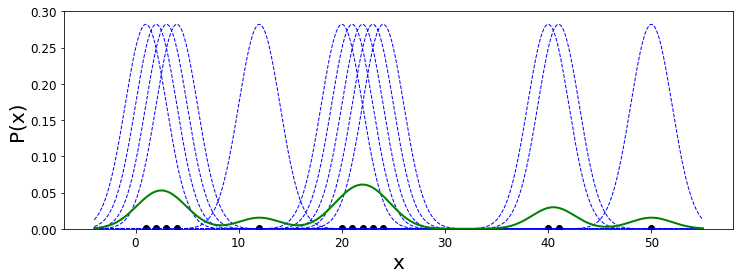

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
# gera os dados
X = np.array([1, 2, 3, 4, 12, 20,21,22,23,24,40,41, 50])
X = X.reshape((len(X), 1))
# mostra os dados
plt.figure(figsize=(12,4))
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')

# valores x para serem usados nas densidades
X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]

h=2
fhat = 0 # estimacao obtida
for x in X:
    # distribuição normal centrada em x
    # kernel é gaussiano, dá para usar kerneis diferentes
    f = (1/np.sqrt(2*np.pi*h))*np.exp(-((X_plot - x)**2)/(2*h**2))
    fhat = fhat + f # acumula as distribuições
    plt.plot(X_plot,f, '--', color = 'blue', linewidth=1)

# mostra a distribuição estimada
plt.plot(X_plot,fhat/(len(X)*np.sqrt(h)), color = 'green', linewidth=2)
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0, 0.3))
plt.savefig('kernel-ex.eps')
plt.show(True)

Esse resultado pode ser obtido usando-se a função KernelDensity scikit-learn.

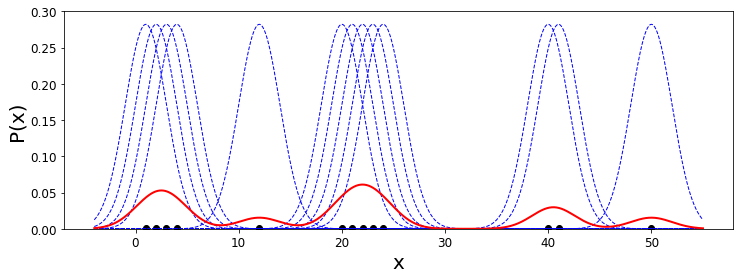

In [13]:
import numpy as np
from matplotlib.pyplot import cm
from sklearn.neighbors import KernelDensity

color=['red', 'blue', 'magenta', 'gray', 'green']

N = 20
X = np.array([1, 2, 3, 4, 12, 20,21,22,23,24,40,41, 50])
X = X.reshape((len(X), 1))

plt.figure(figsize=(12,4))
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')

X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]

h=2
fhat = 0
for x in X:
    f = (1/np.sqrt(2*np.pi*h))*np.exp(-((X_plot - x)**2)/(2*h**2))
    fhat = fhat + f
    plt.plot(X_plot,f, '--', color = 'blue', linewidth=1)

kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)
log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
plt.plot(X_plot,log_dens, color = 'red', linewidth=2, label = 'h='+str(h))    
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0, 0.3))

plt.show(True)

Notem que o formato da estimação depende do parâmetro livre $h$.

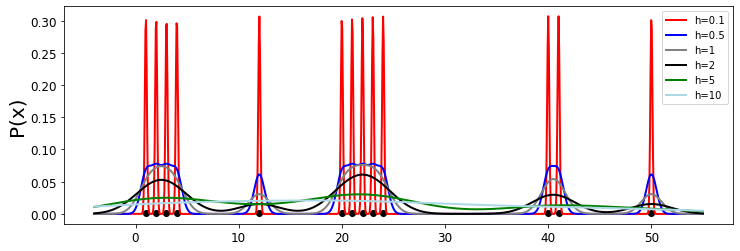

In [14]:
import numpy as np
from matplotlib.pyplot import cm

color=['red', 'blue', 'gray', 'black', 'green', 'lightblue']

N = 20
X = np.array([1, 2, 3, 4, 12, 20,21,22,23,24,40,41, 50])
X = X.reshape((len(X), 1))

X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]

plt.figure(figsize=(12,4))
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')
c = 0
vh = [0.1, 0.5, 1, 2, 5, 10]
for h in vh:
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)
    log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
    plt.plot(X_plot,log_dens, color = color[c], linewidth=2, label = 'h='+str(h))
    c = c + 1
plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim((0, 0.2))
plt.legend(fontsize = 10)
#plt.savefig('kernel.eps')
plt.show(True)

Notem que a estimação é relacionada com a estimação usando-se histogramas.

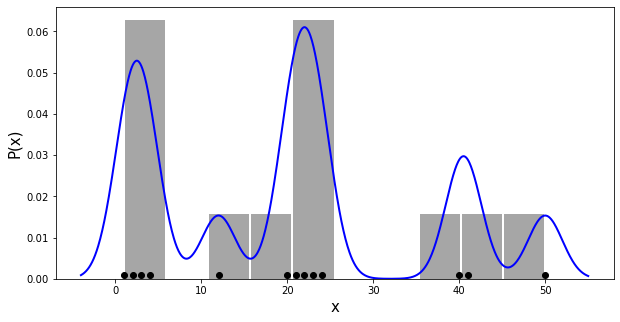

In [15]:
import numpy as np

N = 20
X = np.array([1, 2, 3, 4, 12, 20,21,22,23,24,40,41, 50])
X = X.reshape((len(X), 1))

plt.figure(figsize=(10,5))
# Histogram
nbins = 10
plt.hist(X,bins = nbins, density = True, color='gray',alpha=0.7, rwidth=0.95)

#Kernel density estimation
X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(X)
log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
plt.plot(X_plot,log_dens, color = 'blue', linewidth=2)
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')
plt.xlabel('x', fontsize = 15)
plt.ylabel('P(x)', fontsize = 15)

plt.show(True)

Usando o método *kernel density estimation*, podemos realizar a classificação.

In [16]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score

random.seed(42)
data = pd.read_csv('data/Iris.csv', header=(0))
# data = pd.read_csv('data/Vehicle.csv', header=(0))

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements[0])/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]
        
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.9666666666666667
